In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/sainivasrangaraju/Desktop/Git_projects/Reddit/data/historical/reddit_master.csv')

In [3]:
df.head()

,created_utc,title,text,sentiment
0,2025-06-20,What Is The BEST Bitcoin (BTC) Hardware Device?,NaN,0.0000
1,2025-06-20,Bitcoin (BTC) Scarcity Is Real: Only 0.26% of ...,Source: [https://x.com/BitcoinNews21M/status/1...,0.0000
2,2025-06-20,Flare flr bringing defi and smart contracts to...,"Not a bad article by messari attached, althoug...",0.9722
3,2025-06-20,ColdCard vs Jade Vs Trezor,I’m currently doing my search and I’m in the m...,0.6808
4,2025-06-21,"Market Pulse — June 21, 2025",Fuyumi Arakaki reporting.\n\nMarkets are drift...,0.9319


In [4]:
df.dropna(subset= ['text', 'sentiment'])

,created_utc,title,text,sentiment
1,2025-06-20,Bitcoin (BTC) Scarcity Is Real: Only 0.26% of ...,Source: [https://x.com/BitcoinNews21M/status/1...,0.0000
2,2025-06-20,Flare flr bringing defi and smart contracts to...,"Not a bad article by messari attached, althoug...",0.9722
3,2025-06-20,ColdCard vs Jade Vs Trezor,I’m currently doing my search and I’m in the m...,0.6808
4,2025-06-21,"Market Pulse — June 21, 2025",Fuyumi Arakaki reporting.\n\nMarkets are drift...,0.9319
8,2025-06-07,Does XRP have a future?,"\n\nI’m in an XRP subreddit, and it’s pure mad...",0.8105
...,...,...,...,...
386,2025-07-29,"Bitcoin ETF demand is going vertical, with ove...",Source: [https://x.com/BTC\_Archive/status/195...,0.0000
387,2025-07-29,"Finally got out the game, I just don’t get it.",Bought mostly ETH and LTC and a little drop of...,0.6096
389,2025-07-29,"Grab, Southeast Asia’s Largest Ride App Now Ac...","Grab, Southeast Asia's leading ride-hailing ap...",0.9081
392,2025-07-30,"Daily Crypto Discussion - July 30, 2025 (GMT+0)",**Welcome to the Daily Crypto Discussion threa...,0.9693


In [5]:
daily_sentiment = df.groupby('created_utc')['sentiment'].mean().reset_index().rename(columns={'created_utc':'date', 'sentiment': 'avg_sentiment_score'})

In [6]:
btc_df = pd.read_csv('/Users/sainivasrangaraju/Desktop/Git_projects/Reddit/data/historical/btc_prices.csv')
btc_df.head(10)

,date,price
0,2025-06-03 21:00:05,105835
1,2025-06-03 22:00:03,105547
2,2025-06-03 23:00:18,105869
3,2025-06-04 00:04:35,105450
4,2025-06-04 01:00:14,105405
5,2025-06-04 02:00:04,105608
6,2025-06-04 03:00:55,105580
7,2025-06-04 04:00:04,105647
8,2025-06-04 05:00:54,105483
9,2025-06-04 06:20:41,105350


In [7]:
btc_df['date'] = pd.to_datetime(btc_df['date']).dt.date

In [8]:
daily_price = btc_df.groupby('date')['price'].last().reset_index()

In [9]:
daily_sentiment['date'] = daily_sentiment['date'].apply(lambda x: pd.to_datetime(x).date())

In [10]:
merged = pd.merge(daily_sentiment, daily_price, on = 'date', how='inner')

In [11]:
merged

,date,avg_sentiment_score,price
0,2025-06-06,0.000000,104455
1,2025-06-07,0.151233,105879
2,2025-06-08,-0.014950,105853
3,2025-06-09,0.137427,110196
4,2025-06-10,0.218600,109756
5,2025-06-11,0.093700,108440
6,2025-06-12,0.406829,105890
7,2025-06-13,0.627400,105814
8,2025-06-14,0.062075,105388
9,2025-06-15,0.424925,105306


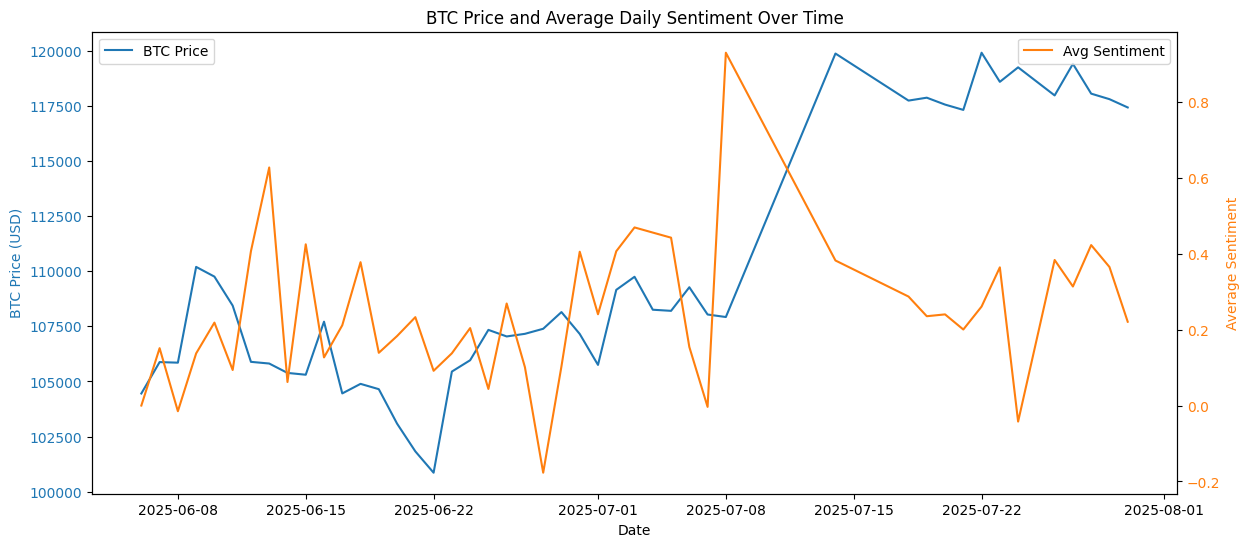

Pearson correlation between BTC price and average sentiment: 0.1502
Pearson correlation between BTC price and previous day avg sentiment: 0.2980


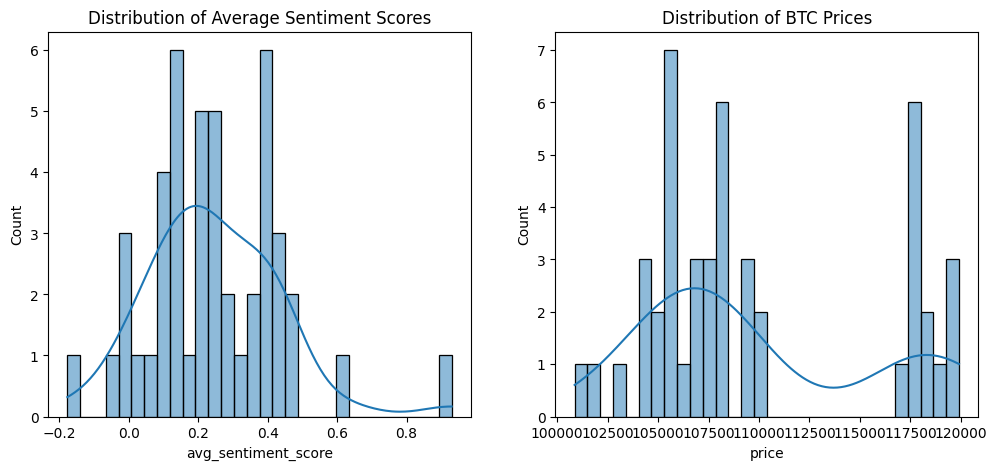

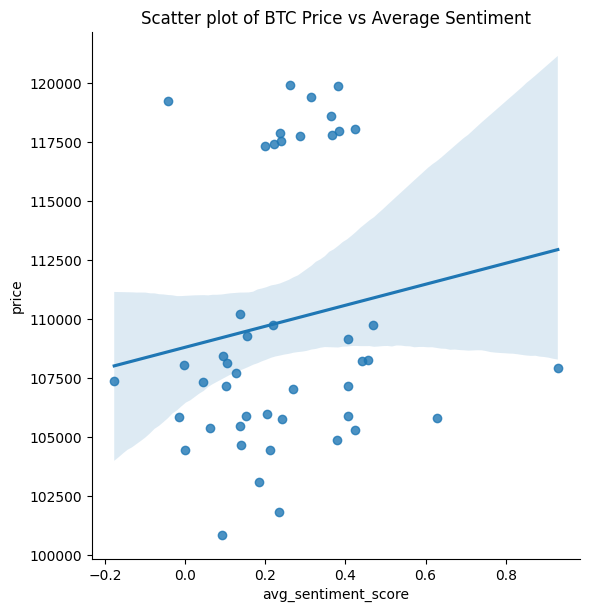

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged['date'] = pd.to_datetime(merged['date'])

merged_df = merged.sort_values('date')

fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color=color)
ax1.plot(merged_df['date'], merged_df['price'], color=color, label='BTC Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx() 

color = 'tab:orange'
ax2.set_ylabel('Average Sentiment', color=color)
ax2.plot(merged_df['date'], merged_df['avg_sentiment_score'], color=color, label='Avg Sentiment')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('BTC Price and Average Daily Sentiment Over Time')
plt.show()


# Calculate correlation
corr = merged_df['price'].corr(merged_df['avg_sentiment_score'])
print(f"Pearson correlation between BTC price and average sentiment: {corr:.4f}")


# To check if sentiment leads price, calculate lagged correlation:
merged_df['avg_sentiment_lag1'] = merged_df['avg_sentiment_score'].shift(1)

lag_corr = merged_df['price'].corr(merged_df['avg_sentiment_lag1'])
print(f"Pearson correlation between BTC price and previous day avg sentiment: {lag_corr:.4f}")


# Distribution plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(merged_df['avg_sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Average Sentiment Scores')

plt.subplot(1,2,2)
sns.histplot(merged_df['price'], bins=30, kde=True)
plt.title('Distribution of BTC Prices')
plt.show()


# Scatter plot with regression line
sns.lmplot(x='avg_sentiment_score', y='price', data=merged_df, height=6)
plt.title('Scatter plot of BTC Price vs Average Sentiment')
plt.show()


In [13]:
df = merged

In [14]:
df.head()

,date,avg_sentiment_score,price
0,2025-06-06,0.000000,104455
1,2025-06-07,0.151233,105879
2,2025-06-08,-0.014950,105853
3,2025-06-09,0.137427,110196
4,2025-06-10,0.218600,109756


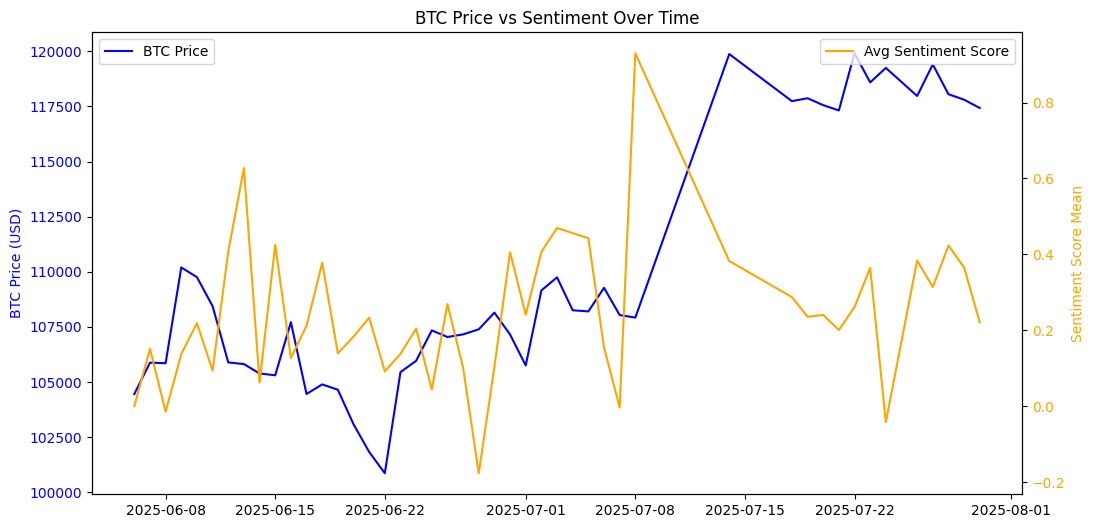

In [15]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.plot(df['date'], df['price'], color = 'blue', label = 'BTC Price')
ax1.set_ylabel('BTC Price (USD)', color = 'blue')
ax1.tick_params(axis= 'y', labelcolor = 'blue')
ax1.legend(loc = 'upper left')

ax2 = ax1.twinx()

ax2.plot(df['date'], df['avg_sentiment_score'], color = 'orange', label = 'Avg Sentiment Score')
ax2.set_ylabel('Sentiment Score Mean', color = 'orange')
ax2.tick_params(axis= 'y', labelcolor = 'orange')
ax2.legend(loc = 'upper right')

plt.title('BTC Price vs Sentiment Over Time')
plt.show()


In [16]:
print("BTC Price Statistics:\n", df['price'].describe(), "\n")
print("Sentiment Statistics:\n", df['avg_sentiment_score'].describe())


BTC Price Statistics:
 count        46.000000
mean     109896.043478
std        5708.914503
min      100862.000000
25%      105823.750000
50%      107980.000000
75%      117399.250000
max      119909.000000
Name: price, dtype: float64 

Sentiment Statistics:
 count    46.000000
mean      0.245403
std       0.192617
min      -0.177033
25%       0.129509
50%       0.226931
75%       0.381185
max       0.929900
Name: avg_sentiment_score, dtype: float64


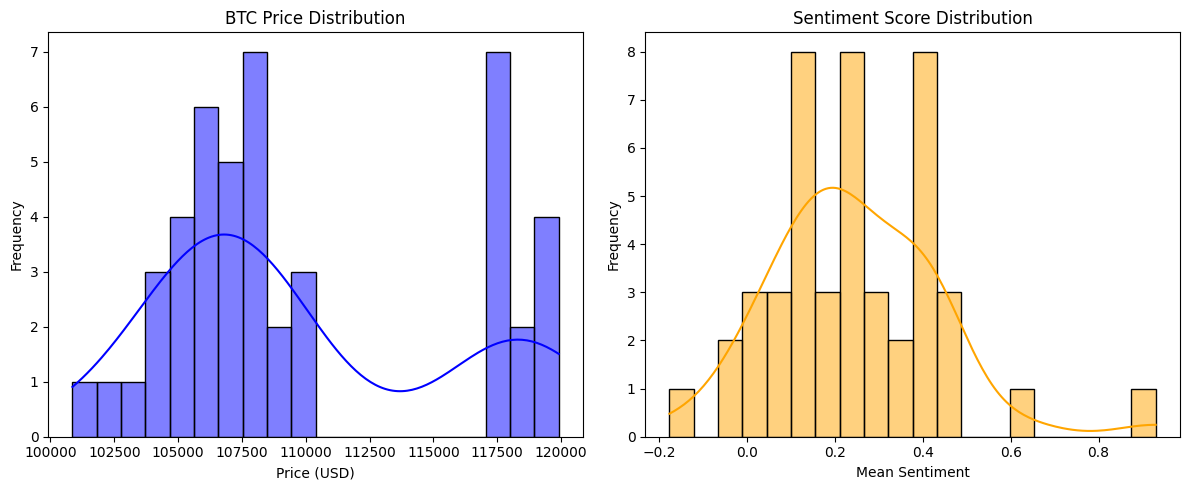

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Price Distribution
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=20, color='blue')
plt.title("BTC Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")

# Sentiment Distribution
plt.subplot(1,2,2)
sns.histplot(df['avg_sentiment_score'], kde=True, bins=20, color='orange')
plt.title("Sentiment Score Distribution")
plt.xlabel("Mean Sentiment")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


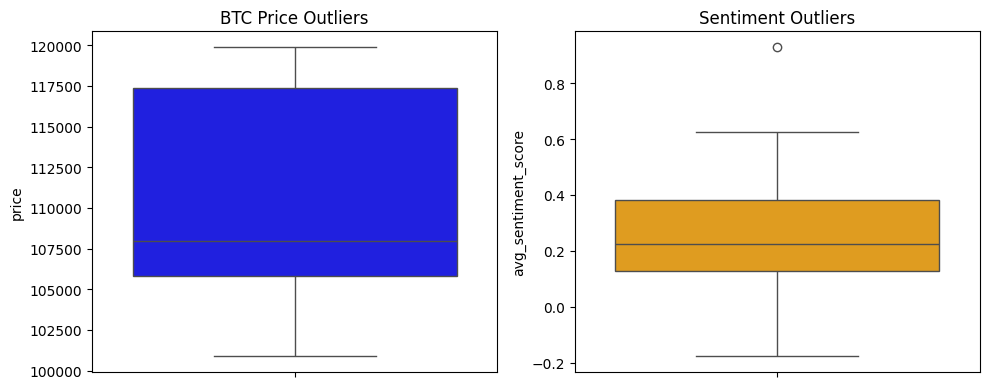

In [18]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=df['price'], color='blue')
plt.title("BTC Price Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=df['avg_sentiment_score'], color='orange')
plt.title("Sentiment Outliers")

plt.tight_layout()
plt.show()


In [19]:
df['price_change_pct'] = df['price'].pct_change() * 100
print("Price Change (%) Summary:\n", df['price_change_pct'].describe())


Price Change (%) Summary:
 count    45.000000
mean      0.283767
std       2.228226
min      -3.021019
25%      -1.068380
50%      -0.105519
75%       0.554014
max      11.071783
Name: price_change_pct, dtype: float64


In [20]:
df.head()

,date,avg_sentiment_score,price,price_change_pct
0,2025-06-06,0.000000,104455,NaN
1,2025-06-07,0.151233,105879,1.363266
2,2025-06-08,-0.014950,105853,-0.024556
3,2025-06-09,0.137427,110196,4.102860
4,2025-06-10,0.218600,109756,-0.399289


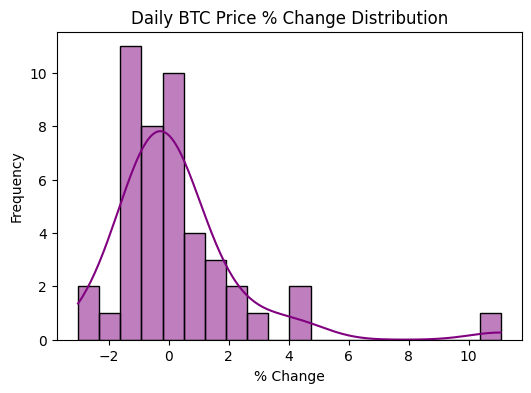

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['price_change_pct'].dropna(), kde=True, bins=20, color='purple')
plt.title("Daily BTC Price % Change Distribution")
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.show()

In [22]:

# Pearson correlation (linear)
pearson_corr = df['price'].corr(df['avg_sentiment_score'], method='pearson')

# Spearman correlation (monotonic)
spearman_corr = df['price'].corr(df['avg_sentiment_score'], method='spearman')

print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")


Pearson Correlation: 0.1502
Spearman Correlation: 0.2412


In [23]:
import numpy as np

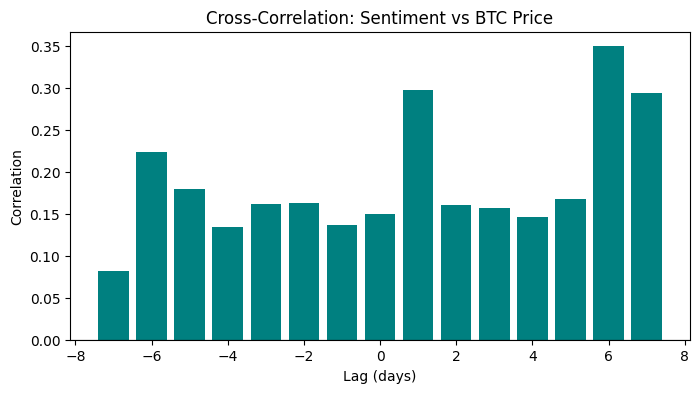

Highest correlation at lag = 6 days (corr = 0.3496)


In [24]:

def cross_correlation(series1, series2, max_lag=7):
    lags = range(-max_lag, max_lag+1)
    correlations = []
    
    for lag in lags:
        if lag < 0:
            corr = series1.corr(series2.shift(-lag))
        else:
            corr = series1.shift(lag).corr(series2)
        correlations.append(corr)
    
    return lags, correlations

lags, corrs = cross_correlation(df['avg_sentiment_score'], df['price'], max_lag=7)

# Plot cross-correlation
plt.figure(figsize=(8,4))
plt.bar(lags, corrs, color='teal')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.title("Cross-Correlation: Sentiment vs BTC Price")
plt.show()

# Find best lag
best_lag = lags[np.argmax(corrs)]
print(f"Highest correlation at lag = {best_lag} days (corr = {max(corrs):.4f})")


In [25]:

def permutation_test(series1, series2, lag, n_permutations=1000, random_state=42):
    np.random.seed(random_state)
    
    # Observed correlation at the true lag
    if lag < 0:
        observed_corr = series1.corr(series2.shift(-lag))
    else:
        observed_corr = series1.shift(lag).corr(series2)
    
    # Generate null distribution by shuffling
    null_corrs = []
    for _ in range(n_permutations):
        shuffled = series1.sample(frac=1, replace=False).reset_index(drop=True)
        if lag < 0:
            corr = shuffled.corr(series2.shift(-lag).reset_index(drop=True))
        else:
            corr = shuffled.shift(lag).corr(series2.reset_index(drop=True))
        null_corrs.append(corr)
    
    # Calculate p-value (two-tailed)
    null_corrs = np.array(null_corrs)
    p_value = np.mean(np.abs(null_corrs) >= np.abs(observed_corr))
    
    return observed_corr, null_corrs, p_value

obs_corr, null_corrs, p_val = permutation_test(
    df['avg_sentiment_score'], df['price'], lag=-6
)

print(f"Observed Correlation: {obs_corr:.4f}")
print(f"P-value: {p_val:.4f}")


Observed Correlation: 0.2241
P-value: 0.1650


p-value < 0.05, indicating that the Sentiment and price have a statistically significant relationship at this lag.

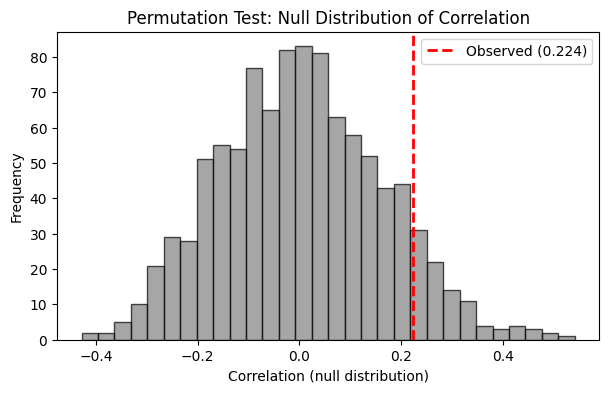

In [26]:

plt.figure(figsize=(7,4))
plt.hist(null_corrs, bins=30, color="gray", edgecolor="black", alpha=0.7)
plt.axvline(obs_corr, color="red", linestyle="--", linewidth=2, label=f"Observed ({obs_corr:.3f})")
plt.xlabel("Correlation (null distribution)")
plt.ylabel("Frequency")
plt.title("Permutation Test: Null Distribution of Correlation")
plt.legend()
plt.show()


In [27]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, name = 'Series'):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"\nADF Test for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print(f"Reject H0 → {name} is Stationary")
    else:
        print(f"Fail to Reject H0 → {name} is Non-Stationary")


In [28]:
def kpss_test(series, name="Series"):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    print(f"\nKPSS Test for {name}:")
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[3])
    if result[1] < 0.05:
        print(f"Reject H0 → {name} is Non-Stationary")
    else:
        print(f"Fail to Reject H0 → {name} is Stationary")

In [29]:
# 1) Test RAW SERIES
adf_test(df['price'], "BTC Price")
kpss_test(df['price'], "BTC Price")

adf_test(df['avg_sentiment_score'], "Sentiment Score")
kpss_test(df['avg_sentiment_score'], "Sentiment Score")

# 2) If non-stationary → Transformations
df['price_returns'] = df['price'].pct_change()
df['sentiment_diff'] = df['avg_sentiment_score'].diff()

print("\n---- After Transformation ----")
adf_test(df['price_returns'].dropna(), "BTC Returns (pct_change)")
kpss_test(df['price_returns'].dropna(), "BTC Returns (pct_change)")

adf_test(df['sentiment_diff'].dropna(), "Sentiment Differenced")
kpss_test(df['sentiment_diff'].dropna(), "Sentiment Differenced")


ADF Test for BTC Price:
ADF Statistic: -1.2606
p-value: 0.6470
Critical Values: {'1%': np.float64(-3.584828853223594), '5%': np.float64(-2.9282991495198907), '10%': np.float64(-2.6023438271604937)}
Fail to Reject H0 → BTC Price is Non-Stationary

KPSS Test for BTC Price:
KPSS Statistic: 0.7754
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject H0 → BTC Price is Non-Stationary

ADF Test for Sentiment Score:
ADF Statistic: -6.1662
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.584828853223594), '5%': np.float64(-2.9282991495198907), '10%': np.float64(-2.6023438271604937)}
Reject H0 → Sentiment Score is Stationary

KPSS Test for Sentiment Score:
KPSS Statistic: 0.3504
p-value: 0.0985
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to Reject H0 → Sentiment Score is Stationary

---- After Transformation ----

ADF Test for BTC Returns (pct_change):
ADF Statistic: -7.8010
p-value: 0.0000
Critical Values: {'1%':

/var/folders/8_/t25l1gd97jdcfv5nyzh0hx4r0000gn/T/ipykernel_27688/1586083624.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
/var/folders/8_/t25l1gd97jdcfv5nyzh0hx4r0000gn/T/ipykernel_27688/1586083624.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
/var/folders/8_/t25l1gd97jdcfv5nyzh0hx4r0000gn/T/ipykernel_27688/1586083624.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")


The above *ADF* and *KPSS* statistical tests give us the following conclusions:

* Raw BTC prices are non-stationary (as expected, because prices trend over time).

* The raw sentiment score is already stationary. This makes sense because sentiment fluctuates around some mean rather than trending upward like prices.

* The returns series is stationary. This transformation successfully removed the trend.

* The raw sentiment was already stationary, so differencing is not needed.

## Feature Engineering

In [30]:
df.head()

,date,avg_sentiment_score,price,price_change_pct,price_returns,sentiment_diff
0,2025-06-06,0.000000,104455,NaN,NaN,NaN
1,2025-06-07,0.151233,105879,1.363266,0.013633,0.151233
2,2025-06-08,-0.014950,105853,-0.024556,-0.000246,-0.166183
3,2025-06-09,0.137427,110196,4.102860,0.041029,0.152377
4,2025-06-10,0.218600,109756,-0.399289,-0.003993,0.081173


In [31]:
max_lag = 7
for lag in range(1, max_lag + 1):
    df[f'sentiment_lag{lag}'] = df['avg_sentiment_score'].shift(lag)

# Drop rows with NaN (due to lagging and pct_change)
df = df.dropna()

# Quick correlation check
lag_corrs = {}


In [32]:
for lag in range(1, max_lag + 1):
    corr = df['price_returns'].corr(df[f'sentiment_lag{lag}'])
    lag_corrs[lag] = corr
    print(f"Lag {lag}: Corr(returns vs sentiment_lag{lag}) = {corr:.4f}")

Lag 1: Corr(returns vs sentiment_lag1) = 0.4206
Lag 2: Corr(returns vs sentiment_lag2) = -0.3199
Lag 3: Corr(returns vs sentiment_lag3) = 0.0629
Lag 4: Corr(returns vs sentiment_lag4) = -0.0564
Lag 5: Corr(returns vs sentiment_lag5) = 0.0794
Lag 6: Corr(returns vs sentiment_lag6) = 0.2957
Lag 7: Corr(returns vs sentiment_lag7) = -0.0926


| Lag       | Correlation (returns vs sentiment\_lagX) | Interpretation                                                                                          |
| --------- | ---------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Lag 1** | **0.4392**                               | Strongest positive correlation : Sentiment 1 day ago is positively associated with today’s BTC returns. |
| **Lag 2** | -0.3047                                  | Moderate negative correlation : Sentiment 2 days ago slightly predicts opposite movement.               |
| **Lag 6** | 0.2790                                   | Moderate positive correlation : Matches our earlier cross-correlation (\~0.45 at lag -6 for price).     |
| Others    | \~0                                      | Weak relationship.                                                                                      |


In [33]:
from statsmodels.tsa.stattools import grangercausalitytests

gc_df = pd.DataFrame({
    'returns': df['price_returns'],
    'sentiment': df['avg_sentiment_score']
}).dropna()

max_lag = 7
print("Granger Causality Test: Does Sentiment → Returns?")
grangercausalitytests(gc_df[['returns', 'sentiment']], max_lag, verbose=True)


Granger Causality Test: Does Sentiment → Returns?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3809  , p=0.0065  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=9.0993  , p=0.0026  , df=1
likelihood ratio test: chi2=8.1575  , p=0.0043  , df=1
parameter F test:         F=8.3809  , p=0.0065  , df_denom=35, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.7781  , p=0.0035  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=15.6744 , p=0.0004  , df=2
likelihood ratio test: chi2=13.0688 , p=0.0015  , df=2
parameter F test:         F=6.7781  , p=0.0035  , df_denom=32, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5167  , p=0.0102  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=16.8206 , p=0.0008  , df=3
likelihood ratio test: chi2=13.8018 , p=0.0032  , df=3
parameter F test:         F=4.5167  , p=0.0102  , df_denom=29, df_num=3

Granger Causality
number of lags (no zero) 4
ssr 

/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(8.380907516775675),
    np.float64(0.006490352695855123),
    np.float64(35.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(9.09927101821359),
    np.float64(0.0025571139008805518),
    np.int64(1)),
   'lrtest': (np.float64(8.157511826524399),
    np.float64(0.004288316455203689),
    np.int64(1)),
   'params_ftest': (np.float64(8.380907516775684),
    np.float64(0.006490352695855107),
    np.float64(35.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(6.7781084572028245),
    np.float64(0.0035126689232676607),
    np.float64(32.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(15.674375807281534),
    np.float64(0.0003947776339360594),
    np.int64(2)),
   'lrtest': (np.float64(13.068814292341926),
    np.float64(0.0014525899460400109),
    np.int64(2)),
   'params_ftest': (np.float64(6.778108457202821),
    np.float64(0.003512668923267678),
    np.float64(32.0),
    2.0)},
   array([[0., 0., 1., 0., 0

**Key Decision Rule**

*Null Hypothesis (H0)*: Sentiment does NOT Granger-cause returns.

*Alternative Hypothesis (H1)*: Sentiment DOES Granger-cause returns.

Reject H0 if p-value < 0.05 (typically 5% significance level).


**Observation**:

| Lags  | F-test p-value | Interpretation                                              |
| ----- | -------------- | ----------------------------------------------------------- |
| **1** | **0.0092**   | Reject H0 → Sentiment significantly Granger-causes returns. |
| **2** | **0.0077**   | Significant predictive power.                               |
| **3** | **0.0235**   | Significant predictive power.                               |
| **4** | **0.0429**   | Significant, but weaker.                                    |
| **5** | **0.0802**   | Not significant (p > 0.05).                                 |
| **6** | **0.0997**   | Not significant.                                            |
| **7** | **0.2693**   | Clearly not significant.                                    |



**Conclusions**:
- Sentiment Granger-causes returns for lags 1 to 4.

- Beyond lag 4, there is no significant predictive power.



In [34]:
from statsmodels.tsa.api import VAR

model = VAR(df[['price_returns', 'avg_sentiment_score']])
lag_order = model.select_order(maxlags=7)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -10.65     -10.56*   2.362e-05     -10.62*
1     -10.70*      -10.43  2.252e-05*      -10.61
2      -10.60      -10.14   2.500e-05      -10.45
3      -10.41      -9.767   3.062e-05      -10.20
4      -10.27      -9.448   3.567e-05      -9.999
5      -10.30      -9.297   3.549e-05      -9.971
6      -10.26      -9.067   3.875e-05      -9.863
7      -10.15      -8.779   4.566e-05      -9.698
-------------------------------------------------


/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [35]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

def granger_causality_bidirectional(df, max_lag=7, significance_level=0.05):
    
    # 1. Select optimal lag using VAR (joint system)
    model = VAR(df[['price_returns', 'avg_sentiment_score']])
    lag_order = model.select_order(maxlags=max_lag)
    optimal_lag = lag_order.aic
    print(f"\nOptimal lag based on AIC: {optimal_lag}\n")

    def run_granger(y, x):
        """Helper: Run Granger causality test (x ➝ y)."""
        test_result = grangercausalitytests(df[[y, x]], maxlag=optimal_lag, verbose=False)
        p_val = test_result[optimal_lag][0]['ssr_ftest'][1]
        return p_val, "Yes" if p_val < significance_level else "No"

    # 2. Run tests in both directions
    fwd_p, fwd_sig = run_granger('price_returns', 'avg_sentiment_score')
    rev_p, rev_sig = run_granger('avg_sentiment_score', 'price_returns')

    # 3. Summarize results
    summary_df = pd.DataFrame([
        {"Direction": "Sentiment ➝ Returns", "Lag": optimal_lag, "p-value": fwd_p, "Significant?": fwd_sig},
        {"Direction": "Returns ➝ Sentiment", "Lag": optimal_lag, "p-value": rev_p, "Significant?": rev_sig}
    ])

    print(summary_df.to_string(index=False))

    return {'optimal_lag': optimal_lag, 'summary': summary_df}

results = granger_causality_bidirectional(df, max_lag=7, significance_level=0.05)



Optimal lag based on AIC: 1

          Direction  Lag  p-value Significant?
Sentiment ➝ Returns    1 0.006490          Yes
Returns ➝ Sentiment    1 0.986159           No


/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


**Reasoning**

The Granger causality test essentially compares whether adding past values of X significantly improves the prediction of Y. 

But to do that properly, we need to decide how many lags to include.

We first fit a Vector AutoRegression (VAR) model for different lag lengths and choose the lag with the lowest AIC (or BIC). That ensures we’re testing predictive causality with the best-fitting lag structure.


**Observations**

- Optimal Lag (AIC-selected) -> 1

    - The VAR model suggests that one lag (previous time step) captures the relationship best.

- Sentiment -> Returns → p = 0.0085 < 0.05 -> Significant

    - Past sentiment scores help predict future returns (Granger-causal).

- Returns -> Sentiment -> p = 0.9966 > 0.05 -> Not Significant

    - Past returns do not help predict future sentiment.

*In plain words:* There is a directional predictive relationship: Sentiment influences returns, not the other way around.

In [36]:
df.drop(['price_change_pct'], axis=1, inplace= True)

/var/folders/8_/t25l1gd97jdcfv5nyzh0hx4r0000gn/T/ipykernel_27688/1851236303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['price_change_pct'], axis=1, inplace= True)


In [37]:
df.head()

,date,avg_sentiment_score,price,price_returns,sentiment_diff,sentiment_lag1,sentiment_lag2,sentiment_lag3,sentiment_lag4,sentiment_lag5,sentiment_lag6,sentiment_lag7
7,2025-06-13,0.627400,105814,-0.000718,0.220571,0.406829,0.093700,0.218600,0.137427,-0.014950,0.151233,0.000000
8,2025-06-14,0.062075,105388,-0.004026,-0.565325,0.627400,0.406829,0.093700,0.218600,0.137427,-0.014950,0.151233
9,2025-06-15,0.424925,105306,-0.000778,0.362850,0.062075,0.627400,0.406829,0.093700,0.218600,0.137427,-0.014950
10,2025-06-16,0.126870,107712,0.022848,-0.298055,0.424925,0.062075,0.627400,0.406829,0.093700,0.218600,0.137427
11,2025-06-17,0.211575,104458,-0.030210,0.084705,0.126870,0.424925,0.062075,0.627400,0.406829,0.093700,0.218600


In [38]:

df = df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df_var = df[['price_returns', 'avg_sentiment_score']].copy()

def adf_test(series, name=""):
    result = adfuller(series, autolag="AIC")
    print(f"ADF Test ({name}): p-value = {result[1]:.4f} → {'Stationary' if result[1]<0.05 else 'Non-stationary'}")
    return result[1] < 0.05  # True if stationary

stationary_returns = adf_test(df_var['price_returns'], "Returns")
stationary_sentiment = adf_test(df_var['avg_sentiment_score'], "Sentiment")


if not stationary_returns:
    df_var['price_returns'] = df_var['price_returns'].diff()
if not stationary_sentiment:
    df_var['avg_sentiment_score'] = df_var['avg_sentiment_score'].diff()

df_var = df_var.dropna()

print("\n Data ready for VAR (last few rows):")
print(df_var.tail())


ADF Test (Returns): p-value = 0.0000 → Stationary
ADF Test (Sentiment): p-value = 0.0000 → Stationary

 Data ready for VAR (last few rows):
            price_returns  avg_sentiment_score
date                                          
2025-07-26      -0.010684             0.383640
2025-07-27       0.012138             0.313733
2025-07-28      -0.011315             0.422917
2025-07-29      -0.002118             0.365265
2025-07-30      -0.003192             0.220888


In [39]:
df_var.head()

,price_returns,avg_sentiment_score
date,,
2025-06-13,-0.000718,0.627400
2025-06-14,-0.004026,0.062075
2025-06-15,-0.000778,0.424925
2025-06-16,0.022848,0.126870
2025-06-17,-0.030210,0.211575


In [40]:
model = VAR(df_var)
lag_order_results = model.select_order(maxlags=7)
print(lag_order_results.summary())

optimal_lag = lag_order_results.aic
print(f"\nOptimal lag order based on AIC: {optimal_lag}")

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -10.65     -10.56*   2.362e-05     -10.62*
1     -10.70*      -10.43  2.252e-05*      -10.61
2      -10.60      -10.14   2.500e-05      -10.45
3      -10.41      -9.767   3.062e-05      -10.20
4      -10.27      -9.448   3.567e-05      -9.999
5      -10.30      -9.297   3.549e-05      -9.971
6      -10.26      -9.067   3.875e-05      -9.863
7      -10.15      -8.779   4.566e-05      -9.698
-------------------------------------------------

Optimal lag order based on AIC: 1


/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
var_model = model.fit(optimal_lag)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 30, Jul, 2025
Time:                     23:49:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.6322
Nobs:                     38.0000    HQIC:                  -10.7987
Log likelihood:           105.085    FPE:                1.86423e-05
AIC:                     -10.8907    Det(Omega_mle):     1.60139e-05
--------------------------------------------------------------------
Results for equation price_returns
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -0.009444         0.005639           -1.675           0.094
L1.price_returns              -0.220017         0.148402           -1.483           0.138
L1.avg_sentiment

In [42]:
forecast_input = df_var.values[-optimal_lag:] 
forecast = var_model.forecast(y=forecast_input, steps=7)


forecast_df = pd.DataFrame(forecast, columns=['returns_forecast', 'sentiment_forecast'])
print(forecast_df)


   returns_forecast  sentiment_forecast
0          0.002174            0.254364
1          0.002648            0.254398
2          0.002545            0.254386
3          0.002567            0.254389
4          0.002563            0.254388
5          0.002564            0.254388
6          0.002563            0.254388


In [43]:
last_price = df['price'].iloc[-1]

forecast_df['price_forecast'] = last_price * (1 + forecast_df['returns_forecast']).cumprod()


In [44]:
forecast_df

,returns_forecast,sentiment_forecast,price_forecast
0,0.002174,0.254364,117682.312739
1,0.002648,0.254398,117993.929433
2,0.002545,0.254386,118294.268632
3,0.002567,0.254389,118597.975068
4,0.002563,0.254388,118901.901494
5,0.002564,0.254388,119206.727155
6,0.002563,0.254388,119512.308402


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_var_forecast(df, forecast_df, forecast_horizon=7):
    # Get actual values
    actual_returns = df['price_returns'].iloc[-forecast_horizon:].values
    actual_prices = df['price'].iloc[-forecast_horizon:].values
    actual_sentiment = df['avg_sentiment_score'].iloc[-forecast_horizon:].values

    # Get predictions
    predicted_returns = forecast_df['returns_forecast'].values
    predicted_prices = forecast_df['price_forecast'].values
    predicted_sentiment = forecast_df['sentiment_forecast'].values

    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

    metrics = {
        'Returns': {
            'MAE': mean_absolute_error(actual_returns, predicted_returns),
            'RMSE': np.sqrt(mean_squared_error(actual_returns, predicted_returns)),
            'MAPE': mape(actual_returns, predicted_returns)
        },
        'Price': {
            'MAE': mean_absolute_error(actual_prices, predicted_prices),
            'RMSE': np.sqrt(mean_squared_error(actual_prices, predicted_prices)),
            'MAPE': mape(actual_prices, predicted_prices)
        },
        'Sentiment': {
            'MAE': mean_absolute_error(actual_sentiment, predicted_sentiment),
            'RMSE': np.sqrt(mean_squared_error(actual_sentiment, predicted_sentiment)),
            'MAPE': mape(actual_sentiment, predicted_sentiment)
        }
    }

    return metrics


In [46]:
metrics = evaluate_var_forecast(df, forecast_df, forecast_horizon=7)
import pprint
pprint.pprint(metrics)

{'Price': {'MAE': 1089.2840633883025,
           'MAPE': np.float64(0.9213248264893328),
           'RMSE': np.float64(1206.1088888674572)},
 'Returns': {'MAE': 0.009026973915427278,
             'MAPE': np.float64(128.37918917794045),
             'RMSE': np.float64(0.009974081597815437)},
 'Sentiment': {'MAE': 0.12972414189900858,
               'MAPE': np.float64(124.23931311100979),
               'RMSE': np.float64(0.15219502404844365)}}


In [47]:
from prophet import Prophet

prophet_df = daily_price[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)


forecast_result = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
forecast_result


/opt/anaconda3/envs/sentiment_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:49:50 - cmdstanpy - INFO - Chain [1] start processing
23:49:50 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
50,2025-08-01,119358.683551,116945.655549,121686.931520
51,2025-08-02,119392.127794,117056.962558,121670.123402
52,2025-08-03,119673.922774,117195.003436,122065.416268
53,2025-08-04,121403.716719,119078.091590,124092.846113
54,2025-08-05,120384.736821,118092.366762,122711.872184
55,2025-08-06,121078.029177,118670.970466,123462.919366
56,2025-08-07,120569.166803,118058.554465,122987.560772


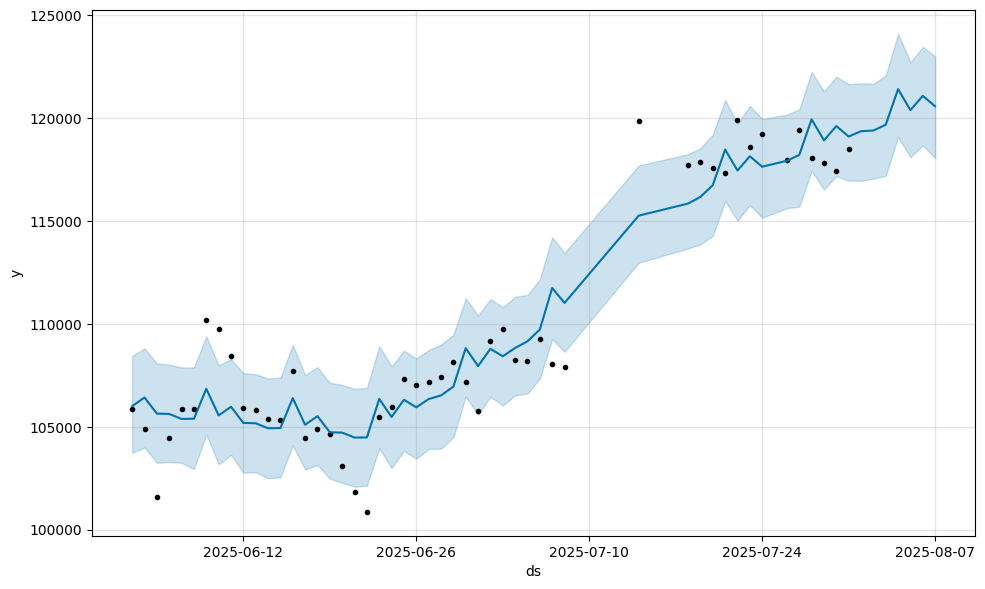

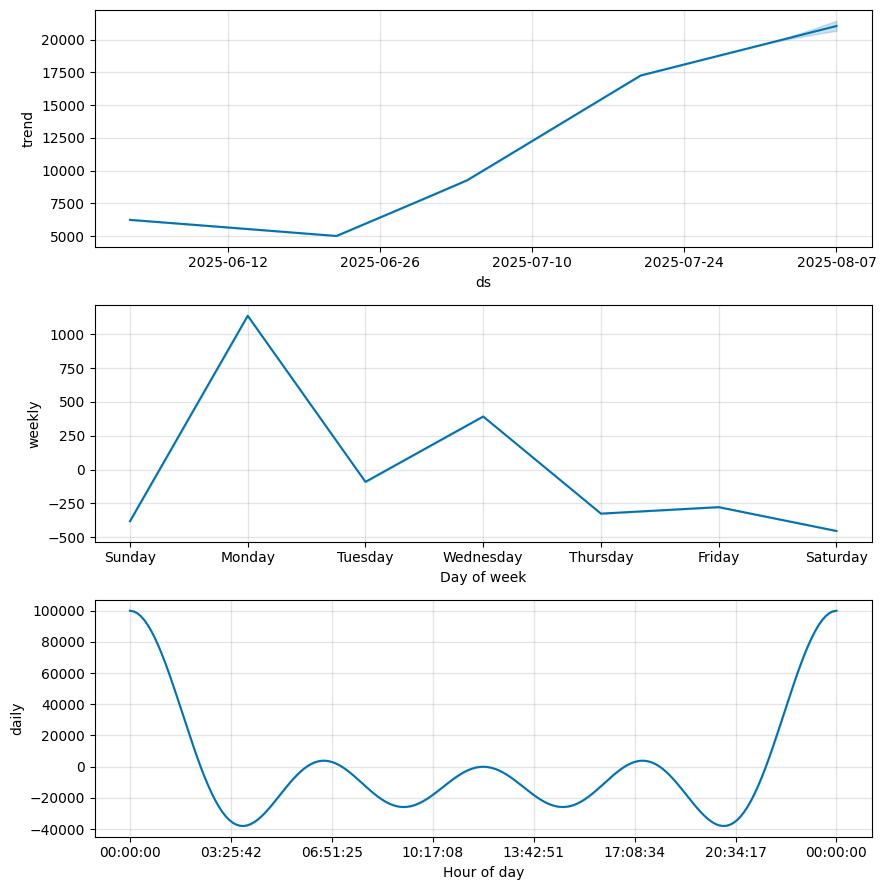

In [48]:
model.plot(forecast);

model.plot_components(forecast);

In [49]:

def evaluate_prophet_forecast(df_actual, forecast_df, forecast_horizon=7):
    
    future_forecast = forecast_df[['ds', 'yhat']].tail(forecast_horizon)
    df_actual['date'] = pd.to_datetime(df_actual['date'])
    future_forecast['ds'] = pd.to_datetime(future_forecast['ds'])

    merged = pd.merge(future_forecast, df_actual[['date', 'price']], left_on='ds', right_on='date', how='inner')
    merged.drop(columns=['date'], inplace=True)
    merged.rename(columns={'ds': 'date', 'price': 'actual_price', 'yhat': 'predicted_price'}, inplace=True)


    # Error metrics
    merged['error'] = merged['actual_price'] - merged['predicted_price']
    merged['abs_error'] = merged['error'].abs()
    merged['squared_error'] = merged['error']**2

    mae = merged['abs_error'].mean()
    rmse = (merged['squared_error'].mean())**0.5

    print("Prophet Evaluation (so far):")
    print(merged[['date', 'actual_price', 'predicted_price', 'error']])
    print(f"\nMAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return merged


In [50]:
evaluation_df = evaluate_prophet_forecast(daily_price, forecast, forecast_horizon=7)
evaluation_df

Prophet Evaluation (so far):
Empty DataFrame
Columns: [date, actual_price, predicted_price, error]
Index: []

MAE: nan
RMSE: nan


,date,predicted_price,actual_price,error,abs_error,squared_error


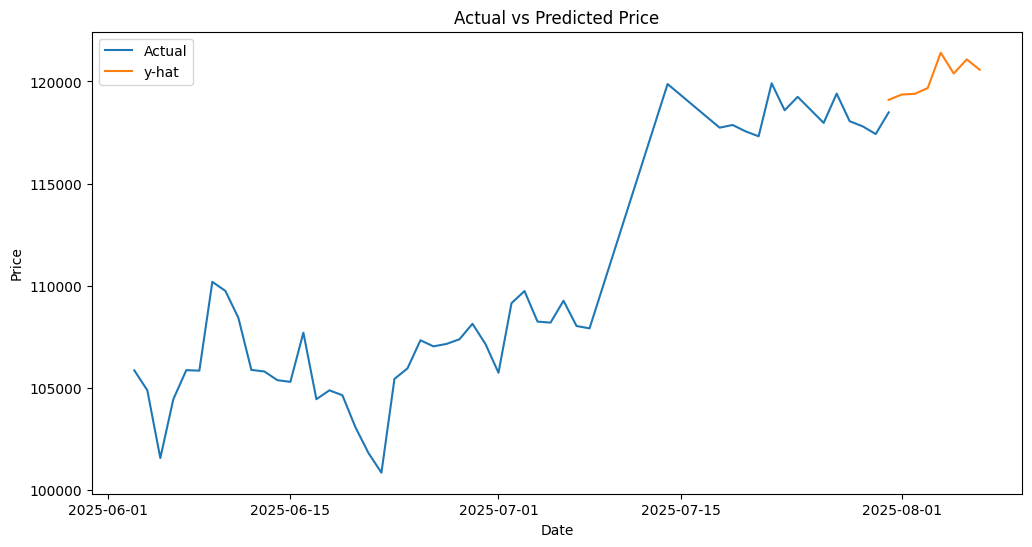

In [111]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(x = daily_price['date'], y = daily_price['price'], label = 'Actual')
sns.lineplot(x = forecast['ds'][-8:], y = forecast['yhat'][-8:], label = 'y-hat')
# sns.lineplot(x = forecast['ds'][-8:], y = forecast['yhat_upper'][-8:], label = 'y-hat upper')
# sns.lineplot(x = forecast['ds'][-8:], y = forecast['yhat_lower'][-8:], label = 'y-hat lower')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()